In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# RGB to LAB (from earlier)
def rgb_to_lab(rgb):
    # (repeated from above for self-contained)
    rgb = rgb / 255.0
    mask = rgb > 0.04045
    rgb[mask] = np.power((rgb[mask] + 0.055) / 1.055, 2.4)
    rgb[~mask] /= 12.92
    rgb *= 100
    xyz = np.dot(rgb, np.array([[0.4124, 0.3576, 0.1805],
                                [0.2126, 0.7152, 0.0722],
                                [0.0193, 0.1192, 0.9505]]).T)
    xyz /= [95.047, 100.0, 108.883]
    mask = xyz > 0.008856
    xyz[mask] = np.power(xyz[mask], 1/3)
    xyz[~mask] = (7.787 * xyz[~mask]) + (16/116)
    lab = np.empty_like(xyz)
    lab[..., 0] = (116 * xyz[..., 1]) - 16
    lab[..., 1] = 500 * (xyz[..., 0] - xyz[..., 1])
    lab[..., 2] = 200 * (xyz[..., 1] - xyz[..., 2])
    return lab

In [3]:
color1 = np.array([0, 150, 0])  # Dark green
color2 = np.array([20, 180, 20])  # Slightly brighter/shifted green

# Compute LAB
lab1 = rgb_to_lab(color1[np.newaxis])
lab2 = rgb_to_lab(color2[np.newaxis])


In [4]:
# Delta E (perceptual distance)
delta_e = np.sqrt(np.sum((lab1 - lab2)**2))
print("RGB distance:", np.linalg.norm(color1 - color2))
print("LAB Delta E:", delta_e)  # Small value indicates perceptual similarity

# Create solid color images
img1 = np.full((100, 100, 3), color1 / 255.0)
img2 = np.full((100, 100, 3), color2 / 255.0)


RGB distance: 41.23105625617661
LAB Delta E: 13.348519142365012


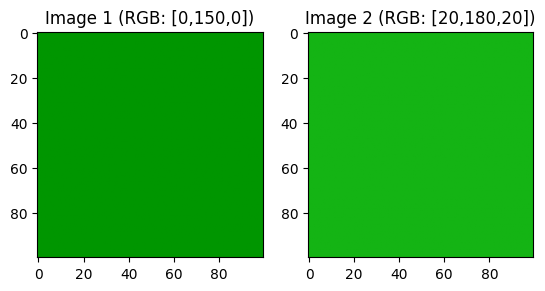

In [5]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[0].set_title('Image 1 (RGB: [0,150,0])')
axs[1].imshow(img2)
axs[1].set_title('Image 2 (RGB: [20,180,20])')
plt.show()